In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp

In [2]:
from math import exp

In [3]:
os.chdir('../dependencies/')
from logistic_regression import logistic_regression

In [4]:
filename = 'data1'
validation_perc = 0.7
training_perc = 0.7
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

In [5]:
log_reg = logistic_regression()
log_reg.load_data(filename)
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)
# log_reg.find_weights(alphas, number_of_iterations )
# log_reg.classify(df_test)

In [6]:
df_validation

,x0,x1,x2,y
14,1,18,43,1
122,1,24,5,0
101,1,27,2,0
168,1,37,37,0
44,1,8,42,1
...,...,...,...,...
26,1,2,40,1
71,1,16,33,1
29,1,3,26,1
88,1,38,44,1


In [7]:
df_validation['x1'] = (df_validation['x1'] - max(df_validation['x1'])) / (max(df_validation['x1']) - min(df_validation['x1'])) 
df_validation['x2'] = (df_validation['x2'] - max(df_validation['x2'])) / (max(df_validation['x2']) - min(df_validation['x2'])) 
df_validation

,x0,x1,x2,y
14,1,-0.653061,-0.142857,1
122,1,-0.530612,-0.918367,0
101,1,-0.469388,-0.979592,0
168,1,-0.265306,-0.265306,0
44,1,-0.857143,-0.163265,1
...,...,...,...,...
26,1,-0.979592,-0.204082,1
71,1,-0.693878,-0.346939,1
29,1,-0.959184,-0.489796,1
88,1,-0.244898,-0.122449,1


In [8]:
def norm(vector):
    vector = [v**2 for v in vector]
    vector = float(sum(vector))
    vector = vector ** 0.5
    return vector

def sigmoid(x,w):
#     print(w.shape,x.shape)
    f_x = 1/(1 + exp(-float(maths.matmul(w.T,x)))) 
    
    return f_x

In [ ]:
X = df_validation.iloc[:,:-1]
Y = df_validation.iloc[:,-1]

w_star = maths.matrix(maths.random.randint(0,10,X.shape[1])).T

w_old = w_star + [1]

iteration_number = 1

epsilon = 1e-8
alpha = 0.1
norms = [1]
while norms[-1] > epsilon :
# while iteration_number < 1e3:
    w_old = w_star
    iteration_number = iteration_number + 1
    for i in range(len(X)):
        x = maths.matrix(X.iloc[i]).T
        y = Y.iloc[i]
    w_star = w_star + alpha * (y - sigmoid(x,w_star)) * x
    norms.append(norm( w_star - w_old ))
        
    
figure = graph.figure(figsize = (15,10))
graph.ylabel("Norms")
graph.xlabel("Iterations")
graph.plot(norms)
graph.grid(True)
print(w_star)
print(len(norms))

In [173]:
norms[2] > epsilon

False

[[ -14.94516375]
 [-119.17472094]
 [ 104.02875078]]


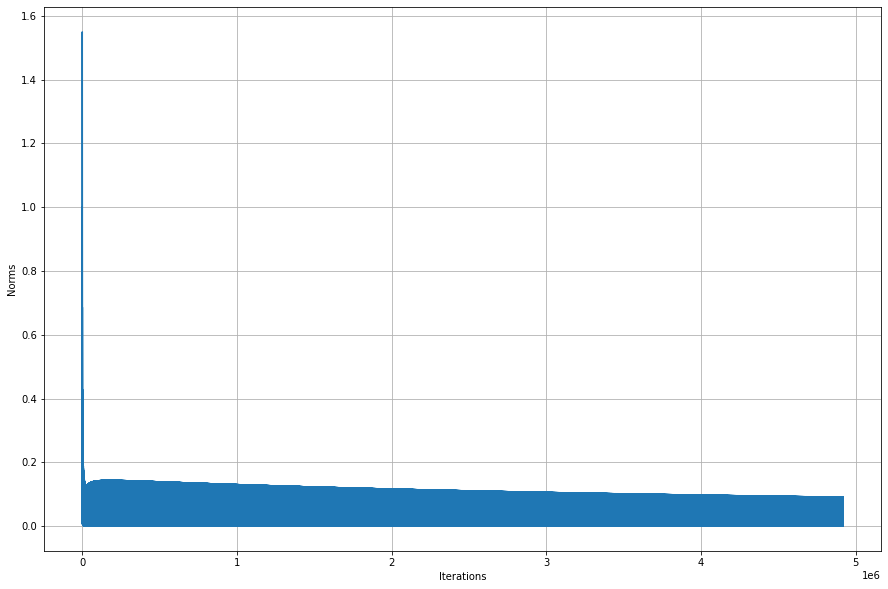

In [179]:
figure = graph.figure(figsize = (15,10))
graph.ylabel("Norms")
graph.xlabel("Iterations")
graph.plot(norms)
graph.grid(True)
print(w_star)